In [1]:
from prefect import task, flow
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
import pandas as pd

In [2]:
def load_data(file_path):
    return pd.read_csv(file_path)

In [3]:
def split_input_output(data, input_col, output_col):
    X = data[input_col]
    y = data[output_col]
    return X, y


In [4]:
def preprocess_train_test(X, y, test_size, random_state):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    return X_train, X_test, y_train, y_test

In [5]:
def vectorize_text(X_train, X_test):
    vectorizer = CountVectorizer()
    X_train_bow = vectorizer.fit_transform(X_train)
    X_test_bow = vectorizer.transform(X_test)
    return X_train_bow, X_test_bow, vectorizer

In [6]:
def scale_data(X_train_bow, X_test_bow):
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train_bow.toarray())
    return X_train_scaled, scaler


In [7]:
def train_model(X_train_scaled, y_train, hyperparameters):
    clf = DecisionTreeClassifier(**hyperparameters)
    clf.fit(X_train_scaled, y_train)
    return clf


In [8]:
def evaluate_model(model, X_test_scaled, y_test):
    y_test_pred = model.predict(X_test_scaled)
    test_score = metrics.accuracy_score(y_test, y_test_pred)
    return test_score

In [9]:
import warnings
warnings.filterwarnings('ignore')

In [10]:
from prefect import task, flow
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import pandas as pd

@task(name='load_data_task-1')
def load_data(file_path):
    data = pd.read_csv(file_path)
    data['Cleaned Review Title'] = data['Cleaned Review Title'].fillna('')  # Replace NaN values with empty strings
    return data

@task(name='split_input_output_task-2')
def split_input_output(data, input_col, output_col):
    X = data[input_col]
    y = data[output_col]
    return X, y

@task(name='preprocess_train_test_task-3')
def preprocess_train_test(X, y, test_size, random_state):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    return X_train, X_test, y_train, y_test

@task(name='vectorize_text_task-4')
def vectorize_text(X_train, X_test):
    vectorizer = CountVectorizer()
    X_train_bow = vectorizer.fit_transform(X_train)
    X_test_bow = vectorizer.transform(X_test)
    return X_train_bow, X_test_bow, vectorizer

@task(name='scale_data_task-5')
def scale_data(X_train_bow, X_test_bow):
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train_bow.toarray())
    return X_train_scaled, scaler

@task(name='train_model_task-6')
def train_model(X_train_scaled, y_train, hyperparameters):
    clf = DecisionTreeClassifier(**hyperparameters)
    clf.fit(X_train_scaled, y_train)
    return clf

@task(name='evaluate_model_task-7')
def evaluate_model(model, X_train_scaled, y_train, X_test_scaled, y_test):
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)

    train_score = metrics.accuracy_score(y_train, y_train_pred)
    test_score = metrics.accuracy_score(y_test, y_test_pred)
    return train_score, test_score

# Define your flow
@flow(name="DecisionTreeclassifier Flow")
def workflow():
    DATA_PATH = r"C:\Users\udayk\Downloads\merged_data.csv"
    INPUT_COL = 'Cleaned Review Title'
    OUTPUT_COL = 'Ratings'
    TEST_SIZE = 0.25
    RANDOM_STATE = 42
    hyperparameters = {'max_depth': 5, 'min_samples_leaf': 2}  # Example hyperparameters

    # Load data
    sentiment_review = load_data(DATA_PATH)

    # Split input-output
    X, y = split_input_output(sentiment_review, INPUT_COL, OUTPUT_COL)

    # Preprocess train-test data
    X_train, X_test, y_train, y_test = preprocess_train_test(X, y, TEST_SIZE, RANDOM_STATE)

    # Vectorize text data
    X_train_bow, X_test_bow, vectorizer = vectorize_text(X_train, X_test)

    # Scale data
    X_train_scaled, scaler = scale_data(X_train_bow, X_test_bow)

    # Train the model
    trained_model = train_model(X_train_scaled, y_train, hyperparameters)

    # Evaluate the model
    X_train_scaled = scaler.transform(X_train_bow.toarray())
    X_test_scaled = scaler.transform(X_test_bow.toarray())
    train_score, test_score = evaluate_model(trained_model, X_train_scaled, y_train, X_test_scaled, y_test)

    # Print the evaluation scores
    print(f"Training Accuracy: {train_score}")
    print(f"Testing Accuracy: {test_score}")

if __name__ == "__main__":
    workflow()


11:35:09.922 | INFO    | prefect.engine - Created flow run 'outrageous-meerkat' for flow 'DecisionTreeclassifier Flow'

11:35:10.084 | INFO    | Flow run 'outrageous-meerkat' - Created task run 'load_data_task-1-0' for task 'load_data_task-1'

11:35:10.084 | INFO    | Flow run 'outrageous-meerkat' - Executing 'load_data_task-1-0' immediately...

11:35:10.266 | INFO    | Task run 'load_data_task-1-0' - Finished in state Completed()

11:35:10.329 | INFO    | Flow run 'outrageous-meerkat' - Created task run 'split_input_output_task-2-0' for task 'split_input_output_task-2'

11:35:10.337 | INFO    | Flow run 'outrageous-meerkat' - Executing 'split_input_output_task-2-0' immediately...

11:35:10.496 | INFO    | Task run 'split_input_output_task-2-0' - Finished in state Completed()

11:35:10.556 | INFO    | Flow run 'outrageous-meerkat' - Created task run 'preprocess_train_test_task-3-0' for task 'preprocess_train_test_task-3'

11:35:10.556 | INFO    | Flow run 'outrageous-meerkat' - Executing 'preprocess_train_test_task-3-0' immediately...

11:35:10.723 | INFO    | Task run 'preprocess_train_test_task-3-0' - Finished in state Completed()

11:35:10.804 | INFO    | Flow run 'outrageous-meerkat' - Created task run 'vectorize_text_task-4-0' for task 'vectorize_text_task-4'

11:35:10.804 | INFO    | Flow run 'outrageous-meerkat' - Executing 'vectorize_text_task-4-0' immediately...

11:35:11.015 | INFO    | Task run 'vectorize_text_task-4-0' - Finished in state Completed()

11:35:11.093 | INFO    | Flow run 'outrageous-meerkat' - Created task run 'scale_data_task-5-0' for task 'scale_data_task-5'

11:35:11.095 | INFO    | Flow run 'outrageous-meerkat' - Executing 'scale_data_task-5-0' immediately...

11:35:11.258 | INFO    | Task run 'scale_data_task-5-0' - Finished in state Completed()

11:35:11.338 | INFO    | Flow run 'outrageous-meerkat' - Created task run 'train_model_task-6-0' for task 'train_model_task-6'

11:35:11.341 | INFO    | Flow run 'outrageous-meerkat' - Executing 'train_model_task-6-0' immediately...

11:35:11.532 | INFO    | Task run 'train_model_task-6-0' - Finished in state Completed()

11:35:11.604 | INFO    | Flow run 'outrageous-meerkat' - Created task run 'evaluate_model_task-7-0' for task 'evaluate_model_task-7'

11:35:11.608 | INFO    | Flow run 'outrageous-meerkat' - Executing 'evaluate_model_task-7-0' immediately...

11:35:11.783 | INFO    | Task run 'evaluate_model_task-7-0' - Finished in state Completed()

Training Accuracy: 0.8777621062529384
Testing Accuracy: 0.8721203573107663


11:35:11.870 | INFO    | Flow run 'outrageous-meerkat' - Finished in state Completed('All states completed.')

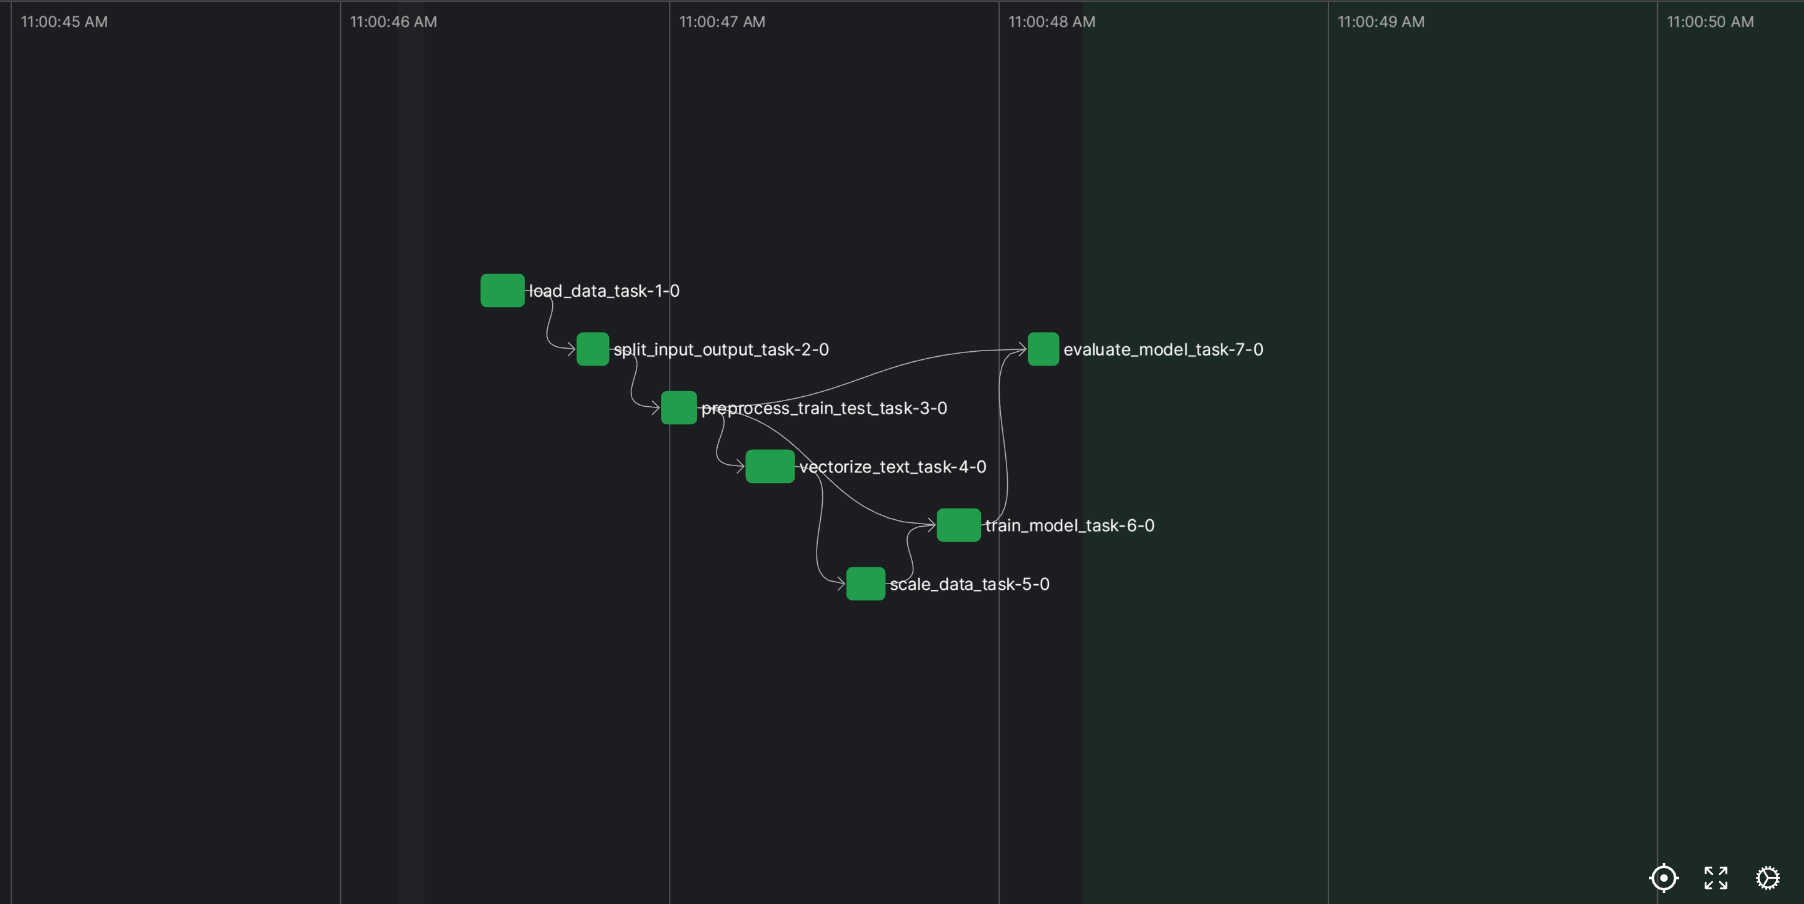

In [3]:
from IPython.display import ImageImage(filename='Screenshot (283).png')
